# [IAPR][iapr]: Lab 2 ‒  Object description


**Group ID:** 26

**Author 1 (sciper):** Andrea Oliveri (283506)  
**Author 2 (sciper):** Charles Berger (272018)   
**Author 3 (sciper):** Chun Hei Michael Chan (311722)  

**Release date:** 26.03.2021  
**Due date:** 23.04.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try:
1. Fourier Descriptors (15pts). 
    1. Implementation (10 pts).
    2. Showing invariance to rotation, translation and scaling (5 pts).
2. Additional method of your choice (5 pts)


**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point. Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

### 1.1 Data visualization

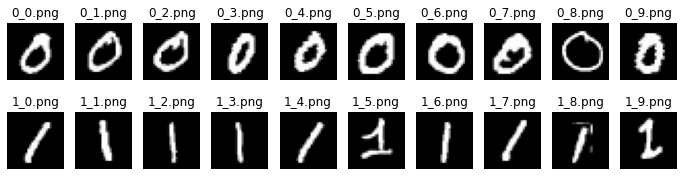

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
#  Load zeros and ones
zeros_im, zeros_names = load(data_part1, digit='0')
ones_im, ones_names = load(data_part1, digit='1')


# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors (15 pts)

# QUESTION: SHOULD WE RETRIEVE ONLY THE OUTER CONTOUR FOR THE ZEROS OR ALSO THE INNER ONE? IF ALSO THE INNER ONE, HOW DO WE LINK THEM WHEN MAKING THE COMPLEX SIGNAL?

# QUESTION: OK TO USE CV FUNCTIONS TO DO EVERYTHING?

# Note: must find a good way to remove noise outside of digits from image. For now thresholding at 150 works fine.

In [3]:
import cv2 as cv
import numpy as np

def get_fourier_descriptor(image, n_coefficients_to_keep = 2):
    
    # Compute outer contours of image.
    _, contour, _ = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    contour = contour[0].squeeze()
    
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(image, cmap = "gray")
    stub_im = np.zeros_like(image)
    for i,j in contour:
        stub_im[j,i] = 1
    ax[1].imshow(stub_im, cmap = "gray")
    plt.show()
    
    # Make complex signal from contour array.
    complex_contour_signal = contour[:, 0] + 1j * contour[:, 1]
    
    # Compute fourier coefficients.
    fourier_coefficients = np.fft.fft(complex_contour_signal)
    
    # To make fourier coefficient resistant to scaling, ratio between coefficients is used instead of actual magnitude.
    fourier_coefficients = fourier_coefficients / fourier_coefficients[0]  
    
    # To make fourier coefficient resistant to translation, first coefficient discarded.
    fourier_coefficients = fourier_coefficients[1:]
    
    # To make fourier coefficient resistant to rotation, phase is discarded.
    fourier_coefficients = np.abs(fourier_coefficients)  
    
    return fourier_coefficients[:n_coefficients_to_keep]


def pretreat_image(image):
    return (image > 150).astype(np.uint8)


def plot_fourier_descriptors(coefficients_digits_list, marker_digits_list, label_digits_list):
    assert(len(coefficients_digits_list) == len(marker_digits_list) == len(label_digits_list))
    
    for coefficients_digit, marker, label in zip(coefficients_digits_list, marker_digits_list, label_digits_list):
        plt.scatter(coefficients_digit[:, 0], coefficients_digit[:, 1], marker = marker, label = label)
        
    plt.legend()
    plt.show()

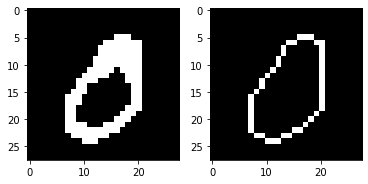

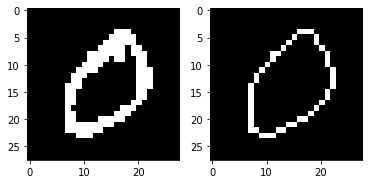

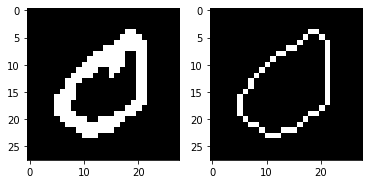

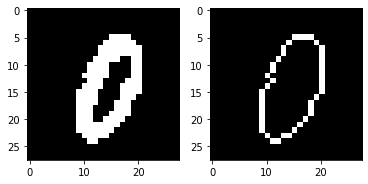

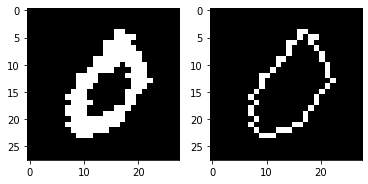

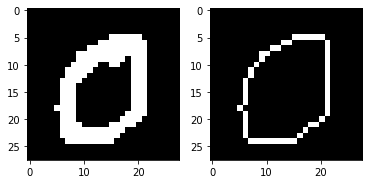

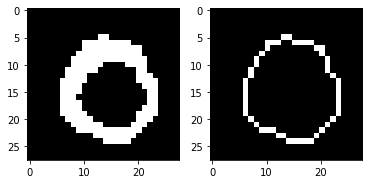

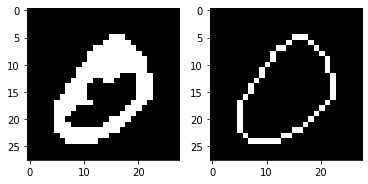

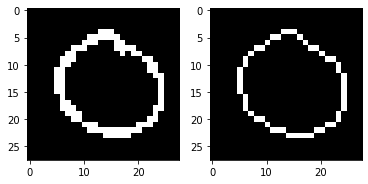

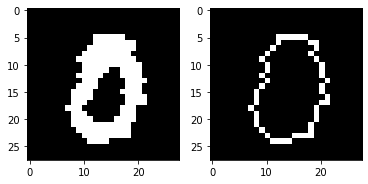

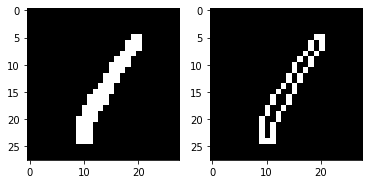

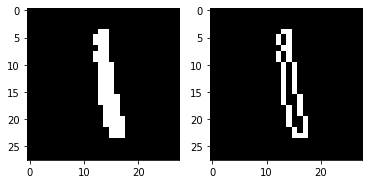

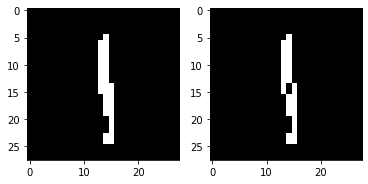

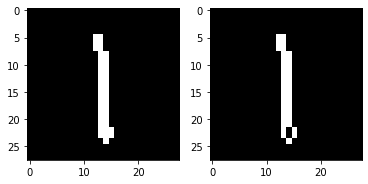

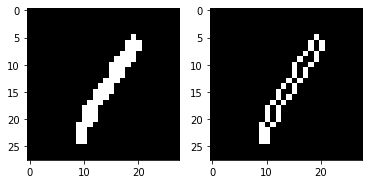

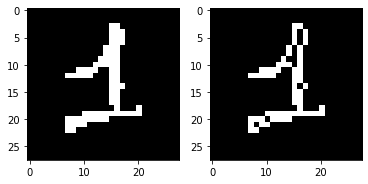

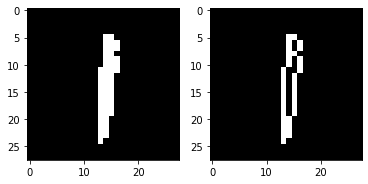

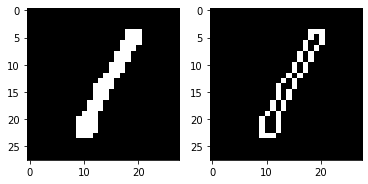

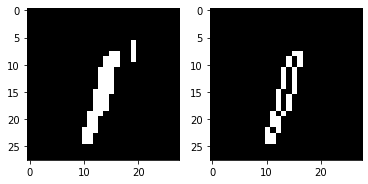

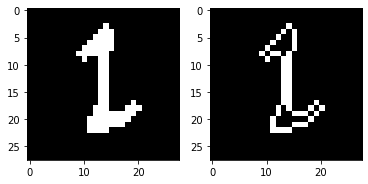

In [4]:
coefficients_zeros = np.asarray([get_fourier_descriptor(pretreat_image(im)) for im in zeros_im])
coefficients_ones  = np.asarray([get_fourier_descriptor(pretreat_image(im)) for im in ones_im])

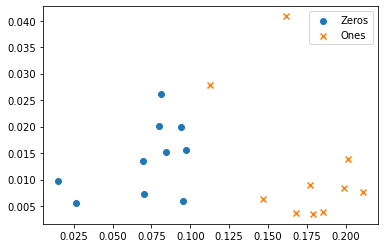

In [5]:
plot_fourier_descriptors([coefficients_zeros, coefficients_ones], ['o', 'x'], ["Zeros", "Ones"])

### 1.3 Additional method (5 pts)

In [6]:
# Add your implementation and discussion

---
## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

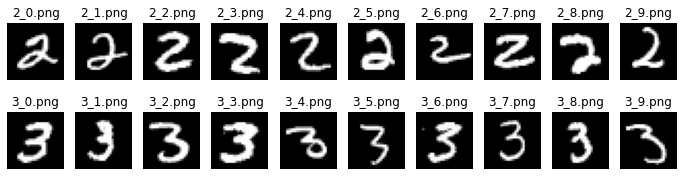

In [7]:
#  Load twos and threes
twos_im, twos_names = load(data_part2, digit='2')
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Fourier descriptors - 4 digits (10 pts)

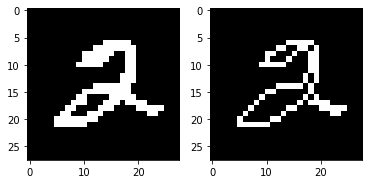

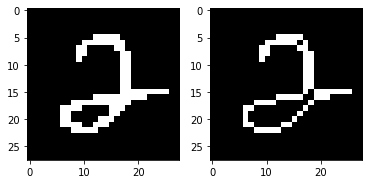

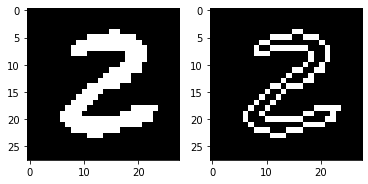

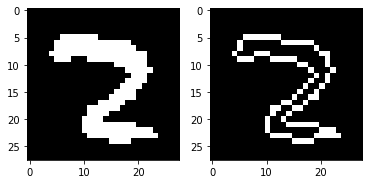

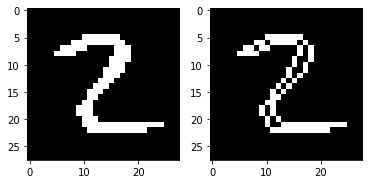

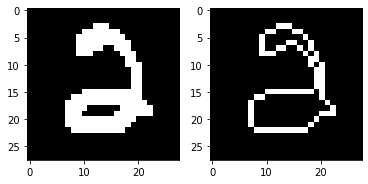

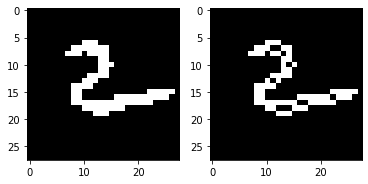

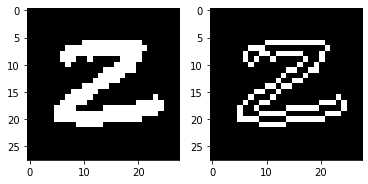

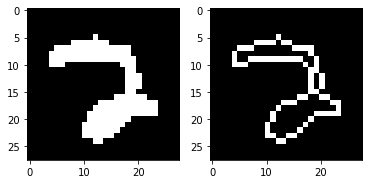

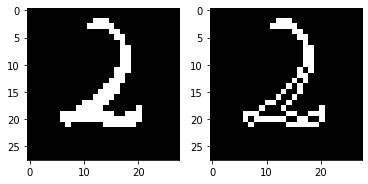

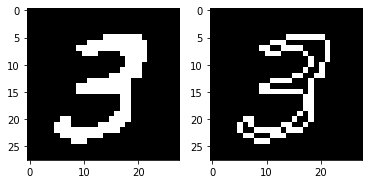

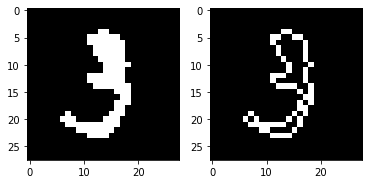

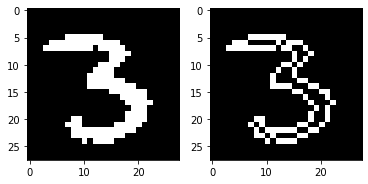

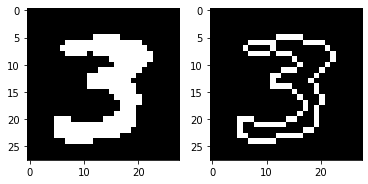

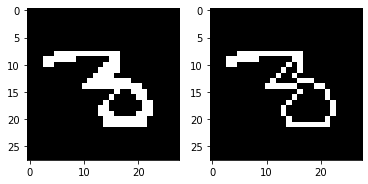

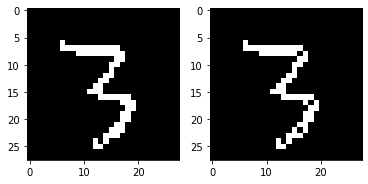

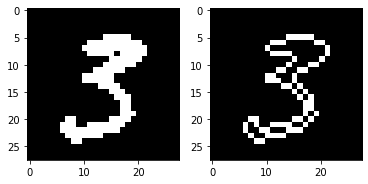

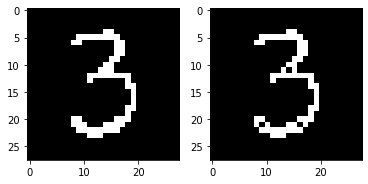

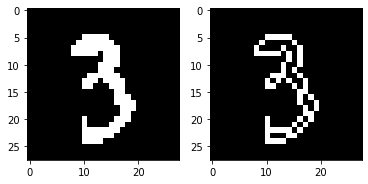

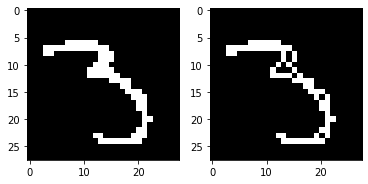

In [8]:
coefficients_twos   = np.asarray([get_fourier_descriptor(pretreat_image(im)) for im in twos_im])
coefficients_threes = np.asarray([get_fourier_descriptor(pretreat_image(im)) for im in threes_im])

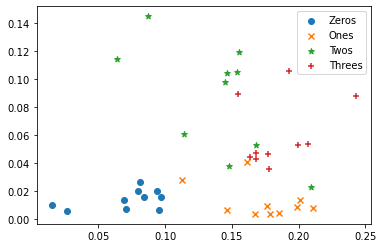

In [9]:
plot_fourier_descriptors([coefficients_zeros, coefficients_ones, coefficients_twos, coefficients_threes], 
                         ['o', 'x', '*', '+'], ["Zeros", "Ones", "Twos", "Threes"])